In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from  pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from sklearn.model_selection import train_test_split
#from chart_studio.plotly import instead

Analise dos dados

In [2]:
base = pd.read_csv('../../dataset/AirPassengers.csv')

In [3]:
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data = lambda dates: pd.datetime.strptime(dates,'%Y-%m') # funçao para transformar em data 

In [5]:
base = pd.read_csv('../../dataset/AirPassengers.csv', parse_dates=['Month'],index_col='Month', date_parser=data)

/home/luzian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [6]:
#base.index = pd.to_datetime(base.index)
#type(base.index)

In [7]:
ts = base['#Passengers']

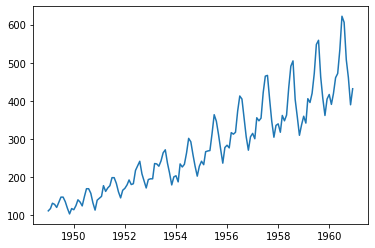

In [8]:
plt.plot(ts)

In [9]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

In [10]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [11]:
ts['1949':'1950']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

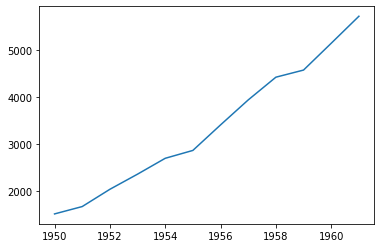

In [12]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

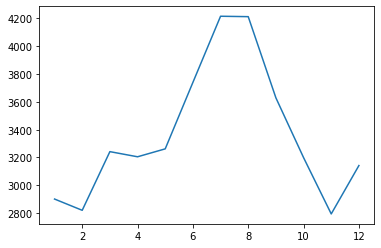

In [13]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

Decomposição dos dados

In [14]:
decom = seasonal_decompose(ts)

In [15]:
tendencia = decom.trend
sazonal = decom.seasonal
aleatorio = decom.resid

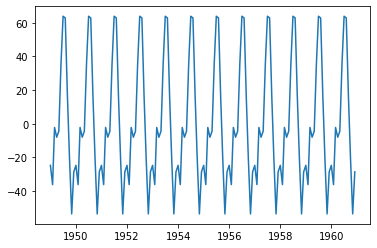

In [16]:
plt.plot(sazonal)

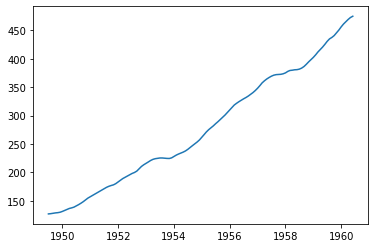

In [17]:
plt.plot(tendencia)

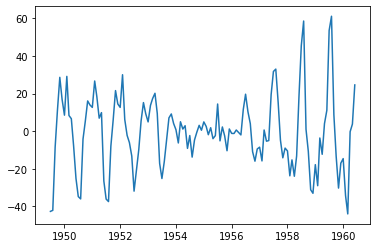

In [18]:
plt.plot(aleatorio)

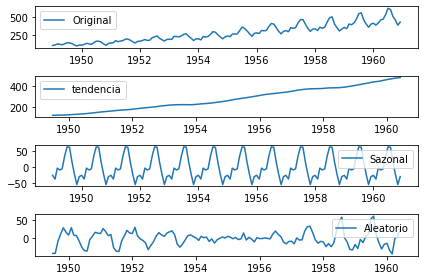

In [19]:
#grafico decomposição 1
plt.subplot(4,1,1)
plt.plot(ts, label='Original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label='tendencia')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label='Sazonal')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label='Aleatorio')
plt.legend(loc = 'best')
plt.tight_layout()

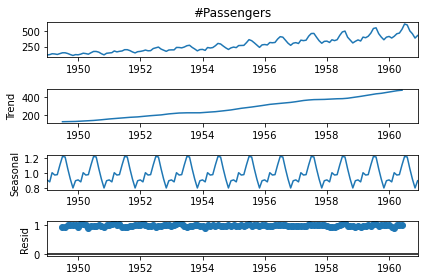

In [20]:
#grafico decomposição 2
seasonal_decompose(ts, model='multiplicative').plot()
plt.tight_layout() # melhora o layout

Previsão com o Arima

In [21]:
# verificar quais os melhores valores com o auto arima para depois usar o arima
modelo = ARIMA(ts, order=(2,1,2)) # (num dos termos regressivos, media movel, sazonal)
modelo_treinado = modelo.fit()

/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [22]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Mon, 13 Jul 2020   AIC                           1344.043
Time:                        21:11:12   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.499      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9998      0.068     14.796      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [76]:
previsoes = modelo_treinado.forecast(steps=24)[0] # pega somente as previsoes
previsoes

array([433.10791115, 450.86873638, 479.78817544, 511.94953112,
       539.30495182, 555.79341237, 558.74686136, 549.28104182,
       531.66069643, 511.8982009 , 496.0218095 , 488.49664064,
       491.19778757, 503.15426598, 521.06096966, 540.35507598,
       556.52407075, 566.28210151, 568.31874085, 563.46294956,
       554.27231358, 544.20711965, 536.64302496, 533.99532521])

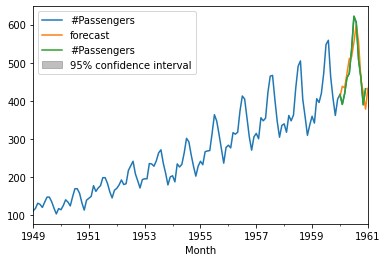

In [74]:
eixo = ts.plot()
teste = modelo_treinado.plot_predict('1960-01-01', '1961-01-01', ax = eixo, plot_insample = True)

# Usando o auto_arima

In [175]:
modelo_auto = auto_arima(ts,m=12, seasonal = True, trace= True)

Performing stepwise search to minimize aic


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(1,1,1,12) [intercept=True]; AIC=1019.198, BIC=1042.200, Time=2.076 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.022 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.382 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.388 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.023 seconds


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(0,1,1,12) [intercept=True]; AIC=1019.088, BIC=1039.215, Time=1.848 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(1,1,0,12) [intercept=True]; AIC=1018.646, BIC=1038.773, Time=1.891 seconds
Near non-invertible roots for order (2, 1, 2)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,1,1,12) [intercept=True]; AIC=1018.264, BIC=1044.141, Time=5.335 seconds


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,1,0,12) [intercept=True]; AIC=1018.882, BIC=1041.883, Time=4.334 seconds
Near non-invertible roots for order (2, 1, 2)(2, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,1,2,12) [intercept=True]; AIC=1020.329, BIC=1049.081, Time=6.446 seconds
Near non-invertible roots for order (2, 1, 2)(2, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(2,1,2)x(1,1,2,12) [intercept=True]; AIC=1021.173, BIC=1047.049, Time=4.626 seconds
Near non-invertible roots for order (2, 1, 2)(1, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(1,1,2)x(2,1,1,12) [intercept=True]; AIC=1015.452, BIC=1038.454, Time=4.576 seconds
Near non-invertible roots for order (1, 1, 2)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,1)x(2,1,1,12) [intercept=True]; AIC=1014.469, BIC=1037.470, Time=4.873 seconds
Near non-invertible roots for order (2, 1, 1)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,2)x(2,1,1,12) [intercept=True]; AIC=1019.908, BIC=1048.660, Time=6.155 seconds
Near non-invertible roots for order (3, 1, 2)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,3)x(2,1,1,12) [intercept=True]; AIC=1011.716, BIC=1040.468, Time=5.568 seconds
Near non-invertible roots for order (2, 1, 3)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,1)x(2,1,1,12) [intercept=True]; AIC=1017.806, BIC=1037.933, Time=3.899 seconds
Near non-invertible roots for order (1, 1, 1)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,3)x(2,1,1,12) [intercept=True]; AIC=1019.352, BIC=1045.229, Time=4.438 seconds
Near non-invertible roots for order (1, 1, 3)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,1)x(2,1,1,12) [intercept=True]; AIC=1016.896, BIC=1042.773, Time=5.778 seconds
Near non-invertible roots for order (3, 1, 1)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,3)x(2,1,1,12) [intercept=True]; AIC=1009.034, BIC=1040.661, Time=6.251 seconds
Near non-invertible roots for order (3, 1, 3)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Total fit time: 68.950 seconds


In [176]:
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(2, 1, [1], 12)   Log Likelihood                -493.517
Date:                              Mon, 13 Jul 2020   AIC                           1009.034
Time:                                      23:48:15   BIC                           1040.661
Sample:                                           0   HQIC                          1021.886
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0051      0.031      0.164      0.870      -0.056       0.066
ar.L1         -0.2709      0.101     -2.679      0.007      -0.469      -0.073
ar.L2         -0.0983      0.096     -1.021      0.307      -0.287       0.090
ar.L3          0.7652      0.095      8.020      0.000       0.578       0.952
ma.L1         -0.0900      0.092     -0.974      0.330      -0.271       0.091
ma.L2          0.0311      0.092      0.340      0.734      -0.149       0.211
ma.L3         -0.9230      0.081    -11.421      0.000      -1.081      -0.765
ar.S.L12       0.5840      0.241      2.427      0.015       0.112       1.055
ar.S.L24       0.3706      0.126      2.942      0.003       0.124       0.617
ma.S.L12      -0.8498      0.455     -1.866      0.062      -1.742       0.043
sigma2        97.5345     22.687      4.299      0.000      53.068     142.001
===================================================================================
Ljung-Box (Q):                       42.02   Jarque-Bera (JB):                11.35
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [177]:
train = ts.loc[:'1959-12-01']
test = ts.loc['1960-01-01':]

In [178]:
modelo_auto.fit(train)

/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(order=(3, 1, 3), seasonal_order=(2, 1, 1, 12))

In [179]:
previsoes_auto = modelo_auto.predict(n_periods=12)

In [180]:
previsoes_auto = pd.DataFrame(previsoes_auto, index=test.index, columns=['#Passengers prev'])

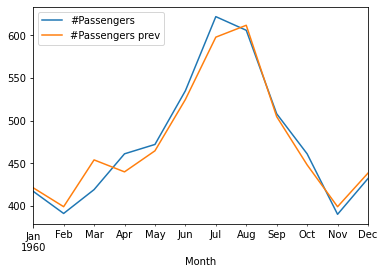

In [181]:
pd.concat([test, previsoes_auto], axis=1).plot() # dados reais e as previsoes

In [182]:
tabela_comp = pd.concat([test, previsoes_auto], axis=1) # dataframe com os dados reais e as previsoes

In [183]:
tabela_comp

,#Passengers,#Passengers prev
Month,,
1960-01-01,417,421.128128
1960-02-01,391,398.951045
1960-03-01,419,453.871645
1960-04-01,461,439.835384
1960-05-01,472,464.526593
1960-06-01,535,524.755987
1960-07-01,622,597.927767
1960-08-01,606,611.865716
1960-09-01,508,504.619764


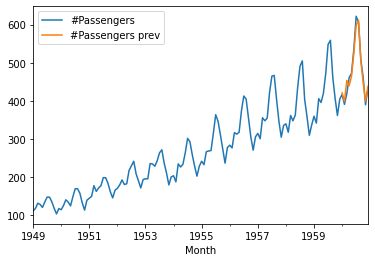

In [184]:
pd.concat([ts, previsoes_auto], axis=1).plot() # dados reais e as previsoes